In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-detection/annotations/maksssksksss737.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss410.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss537.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss295.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss771.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss234.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss620.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss70.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss281.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss393.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss296.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss756.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss260.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss57.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss224.xml
/kaggle/inpu

# Install and Import Libraries

In order to get started, we must import all required libraries. This project is about face mask detection, so first we need to install the OpenCV library, one of the most common library for object detection.

In [2]:
!pip install opencv-python

In [3]:
# Data Manipulation
import pandas as pd

# Numerical Analysis
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Operating System
import os

# Object Detection and Image Cropping
import cv2

# Data Extraction
import glob
from xml.etree import ElementTree

In [4]:
annotations_files = !ls '../input/face-mask-detection/annotations'
annotations_files[:10]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml',
 'maksssksksss102.xml',
 'maksssksksss103.xml',
 'maksssksksss104.xml',
 'maksssksksss105.xml',
 'maksssksksss106.xml']

In [5]:
images_files = !ls '../input/face-mask-detection/images'
images_files[:10]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png',
 'maksssksksss102.png',
 'maksssksksss103.png',
 'maksssksksss104.png',
 'maksssksksss105.png',
 'maksssksksss106.png']

In [6]:
len(annotations_files), len(images_files)

(853, 853)

In [7]:
annotations_directory = '../input/face-mask-detection/annotations'
images_directory = '../input/face-mask-detection/images'

# Data Extraction

I have to give my credit for stpete_ishii on Kaggle for the notebook that helps me get information from the .xml files.

Check out the notebook here: https://www.kaggle.com/stpeteishii/face-mask-get-annotation-info-from-xml

In [8]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

# Get All Information in The Annotations Directory
for annotation in glob.glob(annotations_directory + '/*.xml'):
    tree = ElementTree.parse(annotation)
    
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))    

        if 'object' in element.tag:
            for attribute in list(element):
                # Get Label (Target Variable), Image Width & Height, And Image File Name
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [annotation.split('/')[-1][0:-4]] 
                
                # Get The Bounding Box of Images
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        # Get The Dimension (xmin, ymin, xmax, ymax)
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

After extracting all information from the annotations, we can turn them into a dataframe `annotations_info_df`.

In [9]:
annotations_info_df = pd.DataFrame(information)
annotations_info_df.head(10)

xmin  ymin  xmax  ymax                  label             file  width  \
0    28    55    46    71              with_mask  maksssksksss737    400   
1    98    62   111    78              with_mask  maksssksksss737    400   
2   159    50   193    90  mask_weared_incorrect  maksssksksss737    400   
3   293    59   313    80              with_mask  maksssksksss737    400   
4   352    51   372    72              with_mask  maksssksksss737    400   
5   228    53   241    73              with_mask  maksssksksss737    400   
6    34   153    62   176              with_mask  maksssksksss410    400   
7    88   138   111   163              with_mask  maksssksksss410    400   
8   139   207   168   234              with_mask  maksssksksss410    400   
9   116   135   135   154              with_mask  maksssksksss410    400   

   height  
0     226  
1     226  
2     226  
3     226  
4     226  
5     226  
6     267  
7     267  
8     267  
9     267

# Feature Engineering

In [10]:
# Add Annotation and Image File Names (Appending The Corresponding Extension)
annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.xml'
annotations_info_df['image_file'] = annotations_info_df['file'] + '.png'

# Tidy Grammatical Issue
annotations_info_df.loc[annotations_info_df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'

In [11]:
annotations_info_df.head(10)

xmin  ymin  xmax  ymax                  label             file  width  \
0    28    55    46    71              with_mask  maksssksksss737    400   
1    98    62   111    78              with_mask  maksssksksss737    400   
2   159    50   193    90  mask_incorrectly_worn  maksssksksss737    400   
3   293    59   313    80              with_mask  maksssksksss737    400   
4   352    51   372    72              with_mask  maksssksksss737    400   
5   228    53   241    73              with_mask  maksssksksss737    400   
6    34   153    62   176              with_mask  maksssksksss410    400   
7    88   138   111   163              with_mask  maksssksksss410    400   
8   139   207   168   234              with_mask  maksssksksss410    400   
9   116   135   135   154              with_mask  maksssksksss410    400   

   height      annotation_file           image_file  
0     226  maksssksksss737.xml  maksssksksss737.png  
1     226  maksssksksss737.xml  maksssksksss737.png  
2     226  maksssksksss737.xml  maksssksksss737.png  
3     226  maksssksksss737.xml  maksssksksss737.png  
4     226  maksssksksss737.xml  maksssksksss737.png  
5     226  maksssksksss737.xml  maksssksksss737.png  
6     267  maksssksksss410.xml  maksssksksss410.png  
7     267  maksssksksss410.xml  maksssksksss410.png  
8     267  maksssksksss410.xml  maksssksksss410.png  
9     267  maksssksksss410.xml  maksssksksss410.png

# Check If Label Is Right

Image 737 (maksssksksss737.png) is labeled with several categories, we can simply check the actual image to see if the labels are right.

In [12]:
def render_image(image, figsize):
    plt.figure(figsize = figsize)
    plt.imshow(image)
    plt.show()

def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def display_image_using_filename(image_filename, figsize = (12, 8)):
    image_path = '../input/face-mask-detection/images/' + image_filename
    image = cv2.imread(image_path)
    render_image(convert_to_RGB(image), figsize = figsize)

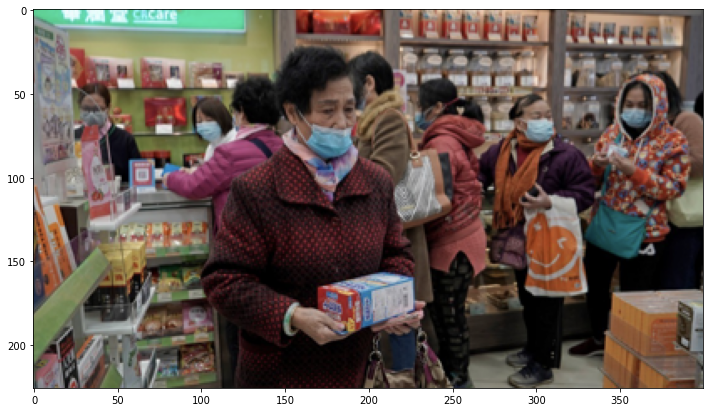

In [13]:
# Display Image 737
display_image_using_filename(annotations_info_df['image_file'].iloc[0])

Seems like all labels of Image 737 (`maksssksksss737.png`) are corresponding to the `annotations_info` dataframe. We can do some simple object detection to detect if a person wears a mask, does not wear a mask, or wear a mask in incorrect way in an image.

In [14]:
def detect_face_mask(image_filename):
    # Filter Data Frame According To Image File Name
    image_df = annotations_info_df[annotations_info_df['image_file'] == image_filename]
    
    # Get All Bounding Boxes of People
    with_mask_list, without_mask_list, incorrectly_worn_list = [], [], []
    for i in range(len(image_df)):
        bounding_box = [image_df['xmin'].iloc[i], image_df['ymin'].iloc[i],
                        image_df['xmax'].iloc[i], image_df['ymax'].iloc[i]]
        if image_df['label'].iloc[i] == 'with_mask':
            with_mask_list.append(bounding_box)
        elif image_df['label'].iloc[i] == 'without_mask':
            without_mask_list.append(bounding_box)
        else:
            incorrectly_worn_list.append(bounding_box)
            
    found_objects_dict = {'With Mask': with_mask_list, 
                          'Without Mask': without_mask_list, 
                          'Incorrectly Worn': incorrectly_worn_list}
    
    # Read Image And Convert to RGB
    image_path = '../input/face-mask-detection/images/' + image_filename
    image = cv2.imread(image_path)
    image_rgb = convert_to_RGB(image)
    
    for key, value in found_objects_dict.items():
        for i in range(len(value)):
            color = (0, 255, 0) # green
            text = 'Mask'
            if key == 'Without Mask':
                color = (255, 0, 0) # red
                text = 'No Mask'
            elif key == 'Incorrectly Worn':
                color = (255, 255, 0) # yellow
                text = 'Incorrect'
                
            # Create Rectangle and Add Text
            start_point = (value[i][0], value[i][1])
            end_point = (value[i][2], value[i][3])
            cv2.rectangle(image_rgb, start_point, end_point, color = color, thickness = 2)
            cv2.putText(image_rgb, org = (value[i][0] - 8, value[i][1] - 3), text = text, 
                        fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = color)
    
    # Show The Final Image With Face Mask Detection
    render_image(image_rgb, (12, 8))

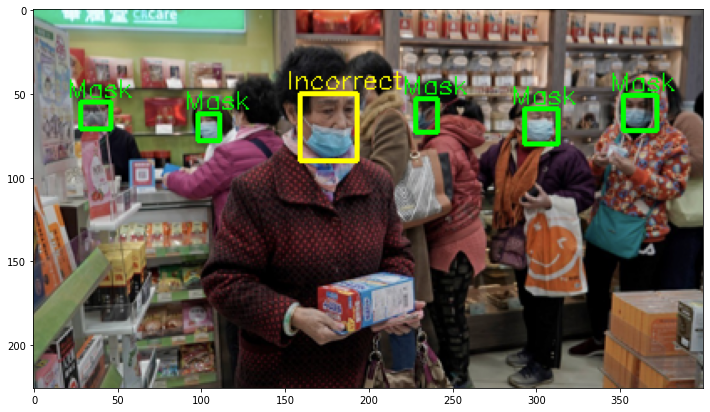

In [15]:
detect_face_mask(annotations_info_df['image_file'].iloc[0])

In the image above, indeed there are 5 people who wears a mask and 1 people who wears a mask incorrectly. Since we already have the `detect_face_mask()` function, we can do some object detections for other images as well!

# Simple Object Detection

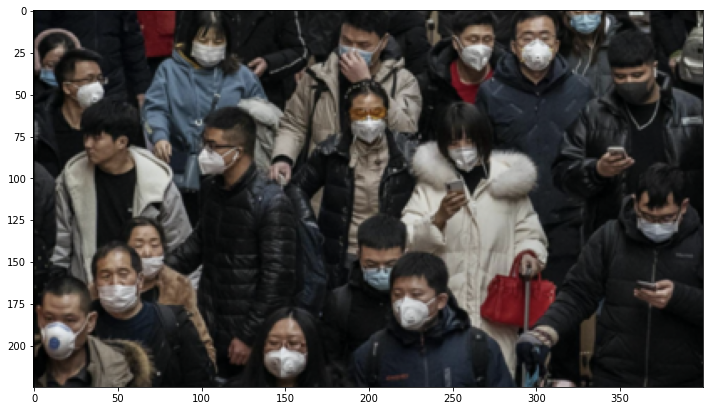

In [16]:
display_image_using_filename('maksssksksss139.png')

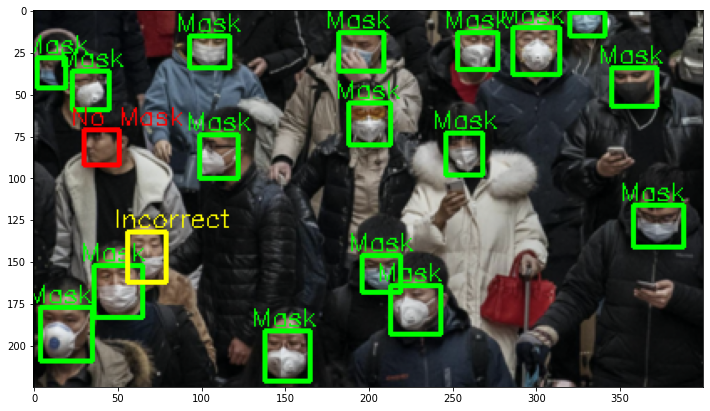

In [17]:
detect_face_mask('maksssksksss139.png')

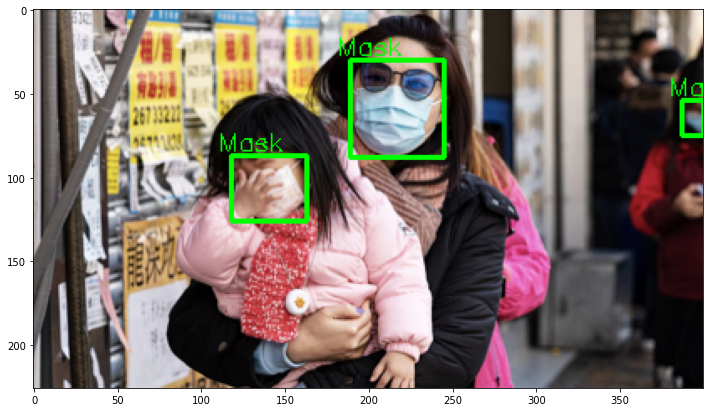

In [18]:
detect_face_mask('maksssksksss100.png')

In the Exploratory Data Analyis notebook, there is a part where I examine the minimum and maximum width and height of an image, but since the real images (uncropped images) are still in this Kaggle Notebook, I just display the images here.

Image `maksssksksss64.png`, `maksssksksss106.png`, and `maksssksksss446.png` have the minimum / maximum width or height of cropped image. The cropped image can be seen in the Exploratory Data Analysis notebook in `Visualizing Image Width and Height Distribution` section.

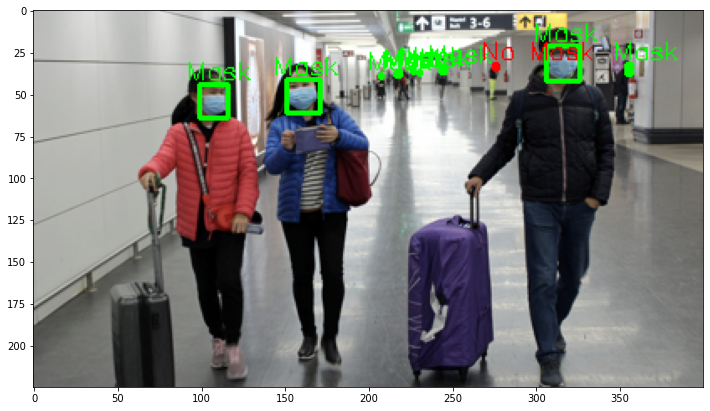

In [19]:
detect_face_mask('maksssksksss64.png')

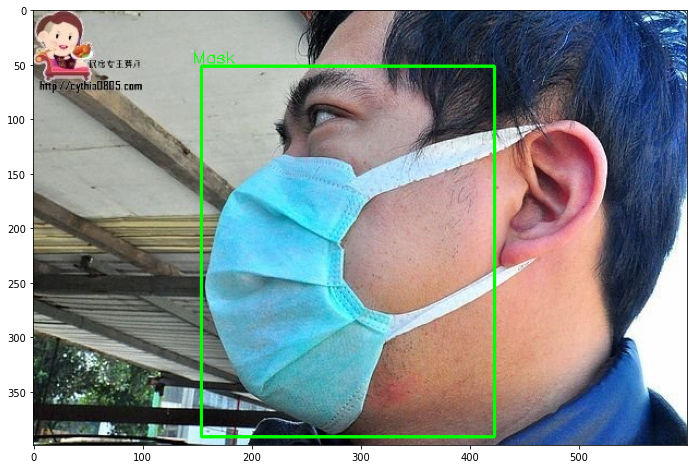

In [20]:
detect_face_mask('maksssksksss106.png')

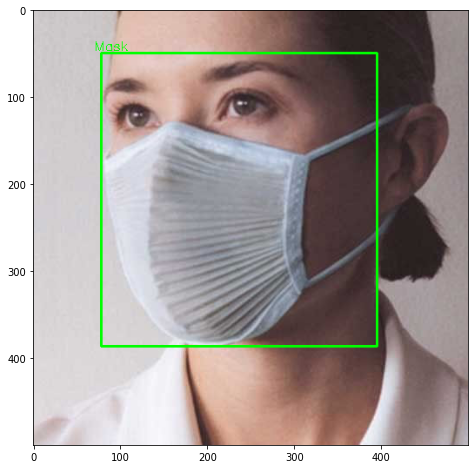

In [21]:
detect_face_mask('maksssksksss446.png')

# Crop Images

Since there are multiple labels in an image (caused by more than 1 person in an image), we need to crop the image into several images that only consist of 1 person. We can use one of the images (ex: image_737) as our sample to make sure that we can crop images in a correct way.

So let's see how the image cropping process works for one of our images (image_737)

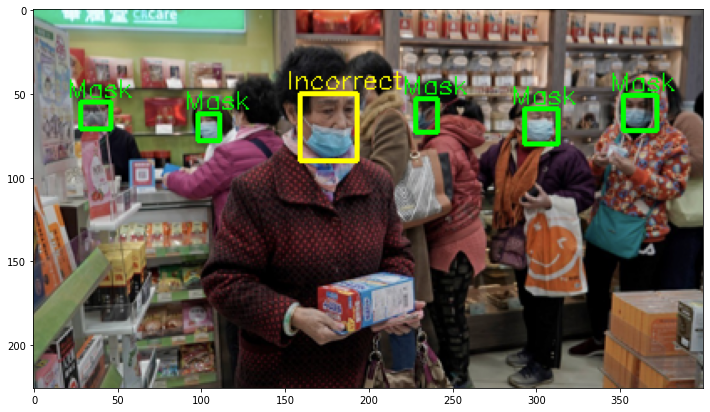

In [22]:
detect_face_mask(annotations_info_df['image_file'].iloc[0])

We need xmin, ymin, xmax, and ymax values so that we can crop the image within the bounding box.

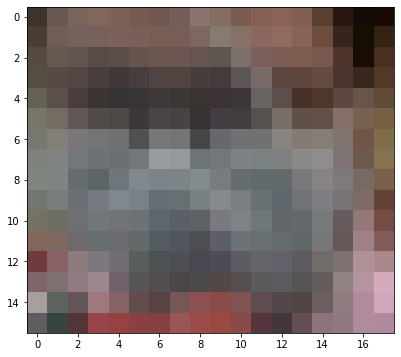

In [23]:
xmin = annotations_info_df['xmin'].iloc[0]
ymin = annotations_info_df['ymin'].iloc[0]
xmax = annotations_info_df['xmax'].iloc[0]
ymax = annotations_info_df['ymax'].iloc[0]

image_737_path = '../input/face-mask-detection/images/' + annotations_info_df['image_file'].iloc[0]
image_737 = cv2.imread(image_737_path)
cropped_737 = image_737[ymin:ymax, xmin:xmax]
render_image(convert_to_RGB(cropped_737), figsize = (8, 6))

In this example, we cropped the leftmost person in image_737 (the lady with glasses who wears a mask). Now, we already know the way to crop a single image. We need to apply this to all images in the dataframe. So, there will be around 4072 cropped images so the "multiple label in an image" problem is solved.

In [24]:
print('There will be {} cropped images.'.format(len(annotations_info_df)))

There will be 4072 cropped images.


# Create a New Directory For Cropped Images

In this section, we are going to crop all images and save them into a new directory. The main reason is that in the next steps, we will use Keras' ImageDataGenerator (in the preprocessing step). But first it's better for us to create a new directory that can save all the cropped images.

In [25]:
!ls '../input/face-mask-detection'

annotations  images


We can see that there are two folders in the ../input/face-mask-detection. However, we can't create a new directory inside this ../input/face-mask-detection or even ../input directory since they are read-only. So, we can add a new folder named cropped_images into the output directory (/kaggle/working).

In [26]:
new_directory = 'cropped_images'
parent_directory = '/kaggle/working'
path = os.path.join(parent_directory, new_directory)
os.mkdir(path)

A new folder called `cropped_image` is created using the path. We can run the command below to check its existance.

In [27]:
!ls './'

__notebook_source__.ipynb  cropped_images


# Adding Cropped Images Into New Directory¶

In [28]:
# Copy The File Name (Before appending with .png extension)
annotations_info_df['cropped_image_file'] = annotations_info_df['file']
annotations_info_df

xmin  ymin  xmax  ymax                  label             file  width  \
0       28    55    46    71              with_mask  maksssksksss737    400   
1       98    62   111    78              with_mask  maksssksksss737    400   
2      159    50   193    90  mask_incorrectly_worn  maksssksksss737    400   
3      293    59   313    80              with_mask  maksssksksss737    400   
4      352    51   372    72              with_mask  maksssksksss737    400   
...    ...   ...   ...   ...                    ...              ...    ...   
4067   229    53   241    72              with_mask   maksssksksss13    400   
4068    51   144   128   239              with_mask  maksssksksss138    400   
4069   147   169   217   233              with_mask  maksssksksss138    400   
4070   224    92   309   186              with_mask  maksssksksss138    400   
4071   115    75   169   135              with_mask  maksssksksss212    267   

      height      annotation_file           image_file cropped_image_file  
0        226  maksssksksss737.xml  maksssksksss737.png    maksssksksss737  
1        226  maksssksksss737.xml  maksssksksss737.png    maksssksksss737  
2        226  maksssksksss737.xml  maksssksksss737.png    maksssksksss737  
3        226  maksssksksss737.xml  maksssksksss737.png    maksssksksss737  
4        226  maksssksksss737.xml  maksssksksss737.png    maksssksksss737  
...      ...                  ...                  ...                ...  
4067     226   maksssksksss13.xml   maksssksksss13.png     maksssksksss13  
4068     267  maksssksksss138.xml  maksssksksss138.png    maksssksksss138  
4069     267  maksssksksss138.xml  maksssksksss138.png    maksssksksss138  
4070     267  maksssksksss138.xml  maksssksksss138.png    maksssksksss138  
4071     400  maksssksksss212.xml  maksssksksss212.png    maksssksksss212  

[4072 rows x 11 columns]

After the `./cropped_images` directory is created, now we can insert all cropped images to that directory. We can simply run a loop to crop all images.

In [29]:
for i in range(len(annotations_info_df)):
    # Get The File Path and Read The Image
    image_filepath = '../input/face-mask-detection/images/' + annotations_info_df['image_file'].iloc[i]
    image = cv2.imread(image_filepath)
    
    # Set The Cropped Image File Name
    annotations_info_df['cropped_image_file'].iloc[i] = annotations_info_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
    cropped_image_filename = annotations_info_df['cropped_image_file'].iloc[i]
    
    # Get The xmin, ymin, xmax, ymax Value (Bounding Box) to Crop Image
    xmin = annotations_info_df['xmin'].iloc[i]
    ymin = annotations_info_df['ymin'].iloc[i]
    xmax = annotations_info_df['xmax'].iloc[i]
    ymax = annotations_info_df['ymax'].iloc[i]

    # Crop The Image Based on The Values Above
    cropped_image = image[ymin:ymax, xmin:xmax]
    
    # Save Cropped Image To The Directory
    cropped_image_directory = os.path.join('./cropped_images', cropped_image_filename) 
    cv2.imwrite(cropped_image_directory, cropped_image)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Saving Data Frame to CSV

Here is the final look of our data frame. It is better for us to save it to CSV file so that we won't have to extract for multiple times in the next steps (Exploratory Data Analysis, Modelling, etc.)

In [30]:
annotations_info_df

xmin  ymin  xmax  ymax                  label             file  width  \
0       28    55    46    71              with_mask  maksssksksss737    400   
1       98    62   111    78              with_mask  maksssksksss737    400   
2      159    50   193    90  mask_incorrectly_worn  maksssksksss737    400   
3      293    59   313    80              with_mask  maksssksksss737    400   
4      352    51   372    72              with_mask  maksssksksss737    400   
...    ...   ...   ...   ...                    ...              ...    ...   
4067   229    53   241    72              with_mask   maksssksksss13    400   
4068    51   144   128   239              with_mask  maksssksksss138    400   
4069   147   169   217   233              with_mask  maksssksksss138    400   
4070   224    92   309   186              with_mask  maksssksksss138    400   
4071   115    75   169   135              with_mask  maksssksksss212    267   

      height      annotation_file           image_file  \
0        226  maksssksksss737.xml  maksssksksss737.png   
1        226  maksssksksss737.xml  maksssksksss737.png   
2        226  maksssksksss737.xml  maksssksksss737.png   
3        226  maksssksksss737.xml  maksssksksss737.png   
4        226  maksssksksss737.xml  maksssksksss737.png   
...      ...                  ...                  ...   
4067     226   maksssksksss13.xml   maksssksksss13.png   
4068     267  maksssksksss138.xml  maksssksksss138.png   
4069     267  maksssksksss138.xml  maksssksksss138.png   
4070     267  maksssksksss138.xml  maksssksksss138.png   
4071     400  maksssksksss212.xml  maksssksksss212.png   

            cropped_image_file  
0        maksssksksss737-0.png  
1        maksssksksss737-1.png  
2        maksssksksss737-2.png  
3        maksssksksss737-3.png  
4        maksssksksss737-4.png  
...                        ...  
4067   maksssksksss13-4067.png  
4068  maksssksksss138-4068.png  
4069  maksssksksss138-4069.png  
4070  maksssksksss138-4070.png  
4071  maksssksksss212-4071.png  

[4072 rows x 11 columns]

In [31]:
annotations_info_df.to_csv('annotations_info.csv', index = False)

# Saving Data Frame and Cropped Images to Google Drive

In [32]:
cropped_images_filenames = !ls './cropped_images'
cropped_images_filenames[:10]

['maksssksksss0-978.png',
 'maksssksksss0-979.png',
 'maksssksksss0-980.png',
 'maksssksksss1-3455.png',
 'maksssksksss1-3456.png',
 'maksssksksss1-3457.png',
 'maksssksksss1-3458.png',
 'maksssksksss1-3459.png',
 'maksssksksss1-3460.png',
 'maksssksksss1-3461.png']

Now our `cropped_images` folder already consists of all cropped images. Due to limited GPU usage on Kaggle, we can save all cropped images to Google Drive, so that we can access them again on other environment, such as Google Colab.